In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt
from shapely import wkt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
stores = pd.read_csv("../../data/stores_train.csv")

avg_revenue_grunnkrets = stores.groupby("grunnkrets_id")['revenue'].mean()
avg_revenue_grunnkrets = np.log1p(avg_revenue_grunnkrets)

count_stores_grunnkrets = stores.groupby("grunnkrets_id")['store_id'].count()
avg_revenue_grunnkrets.head()
#count_stores_grunnkrets.sort_values().head()

grunnkrets_id
1010105    1.810318
1010107    0.966223
1010204    3.680494
1010206    2.489114
1010209    1.086765
Name: revenue, dtype: float64

In [4]:
grunnkrets = pd.read_csv("../../data/grunnkrets_norway_stripped.csv")
grunnkrets.drop(grunnkrets[grunnkrets.year != 2016].index, inplace=True)
grunnkrets = grunnkrets[['grunnkrets_id', 'geometry']]

In [5]:
gk_count_mean = grunnkrets \
                 .merge(avg_revenue_grunnkrets, on='grunnkrets_id') \
                 .merge(count_stores_grunnkrets, on='grunnkrets_id')

In [6]:
gk_count_mean.set_index('grunnkrets_id', inplace=True)

In [7]:
gk_count_mean['geometry'] = gk_count_mean['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(gk_count_mean, geometry='geometry', crs="EPSG:4326")

In [8]:
#gdf = gdf.loc[gdf['store_id'] > 3]

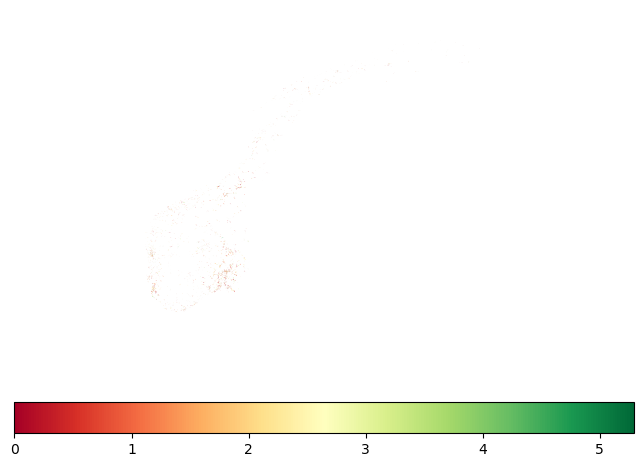

In [9]:
# We can now plot our GeoDataFrame.
gplt.choropleth(gdf, hue='revenue', projection=gplt.crs.AlbersEqualArea(),
    linewidth=1,
    cmap='RdYlGn', legend=True, legend_kwargs={'orientation': 'horizontal'})

plt.savefig("../../figs/norway.pdf", format="pdf")
plt.show()

In [5]:
stores = pd.read_csv("../../data/stores.csv")
stores.revenue = np.log1p(stores.revenue)
%matplotlib qt
sns.scatterplot(x=stores.lon, y=stores.lat, hue=stores.revenue, s=10)

<AxesSubplot:xlabel='lon', ylabel='lat'>